In [6]:
# creating a copy of df
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
import xgboost as xgb



df = pd.read_csv("./datasets/heart.csv")
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

# defining the features and target
X = df1.drop(['output'], axis=1)
y = df1[['output']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
def get_normalization(X):
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized


X_train = get_normalization(X_train);
X_test = get_normalization(X_test);

display(X_train)

# instantiating the object and fitting
svm = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred),f1_score(y_test, y_pred, average='macro'))
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba, axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ",
      accuracy_score(y_test, y_pred),f1_score(y_test, y_pred, average='macro'))
# instantiating the object
dt = DecisionTreeClassifier(random_state=42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, y_pred),f1_score(y_test, y_pred, average='macro'))

# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ",
      accuracy_score(y_test, y_pred),f1_score(y_test, y_pred, average='macro'))

# instantiate the classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

# fitting the model
xgb_classifier.fit(X_train, y_train)

# predicting values
y_pred = xgb_classifier.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ",
      accuracy_score(y_test, y_pred),f1_score(y_test, y_pred, average='macro'))
perm_importance = permutation_importance(svm, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances
rf_importances = rf.feature_importances_
xgb_importances = xgb_classifier.feature_importances_
svm_importances = perm_importance
logireg_importances = abs(logreg.coef_[0])

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'logistice regression': logireg_importances,
    'svm': svm_importances.importances_mean,
    
})

display(feature_importances)



array([[0.27083333, 0.26530612, 0.37875289, ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 0.57142857, 0.32101617, ..., 0.        , 0.        ,
        1.        ],
       [0.35416667, 0.57142857, 0.23094688, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83333333, 0.67346939, 0.23787529, ..., 0.        , 1.        ,
        0.        ],
       [0.35416667, 0.26530612, 0.27251732, ..., 0.        , 0.        ,
        1.        ],
       [0.70833333, 0.46938776, 0.147806  , ..., 0.        , 1.        ,
        0.        ]])

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

The test accuracy score of SVM is  0.8524590163934426 0.8518218623481781
The test accuracy score of Logistric Regression is  0.8852459016393442 0.8851224105461394
The test accuracy score of Decision Tree is  0.7377049180327869 0.7376344086021505
The test accuracy score of Random Forest is  0.819672131147541 0.8196721311475409
The test accuracy score of Gradient Boosting Classifier is  0.8360655737704918 0.8349567099567099


,Feature,RandomForest,XGBoost,logistice regression,svm
0,age,0.093754,0.025709,0.001220,-0.000546
1,trtbps,0.079086,0.022472,0.797780,-0.020765
2,chol,0.083428,0.024680,0.261435,-0.001093
3,thalachh,0.111055,0.021236,0.658222,-0.004372
4,oldpeak,0.130961,0.055354,1.309518,-0.025683
5,sex_1,0.035971,0.032049,1.105216,0.007104
6,exng_1,0.058876,0.058808,0.928059,-0.003825
7,caa_1,0.042417,0.049876,1.635596,0.015847
8,caa_2,0.027480,0.041973,1.906412,0.034973
9,caa_3,0.013873,0.078349,1.165095,0.019672


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature 

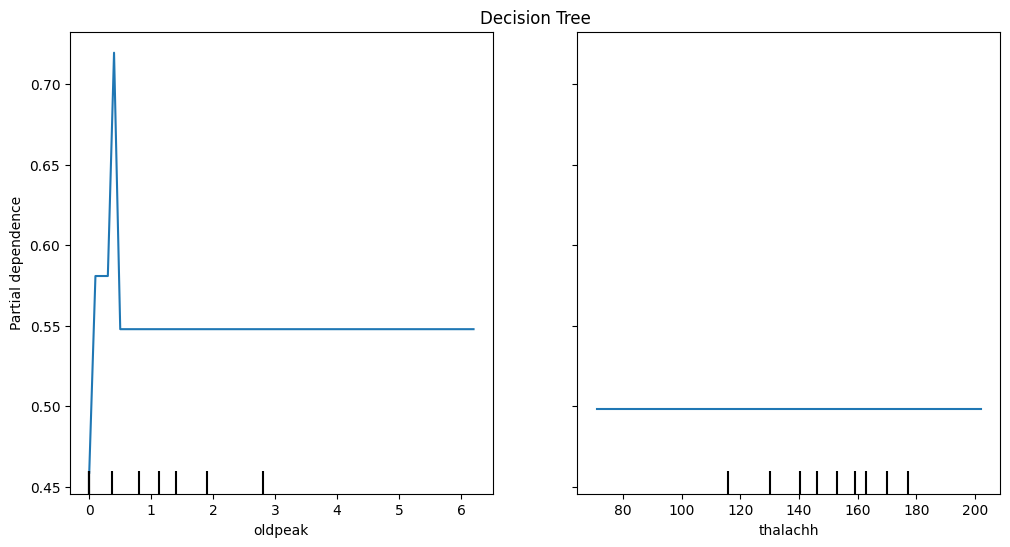

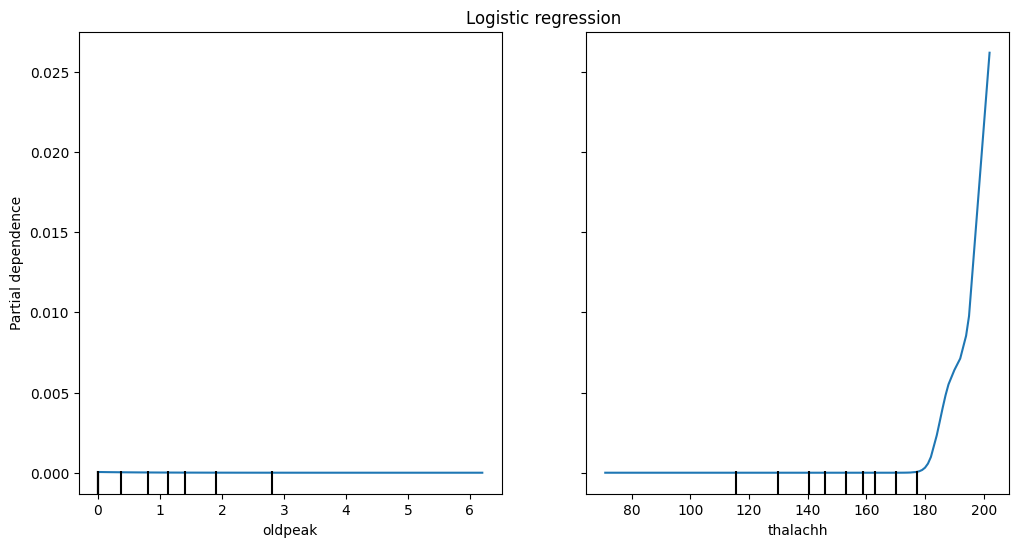

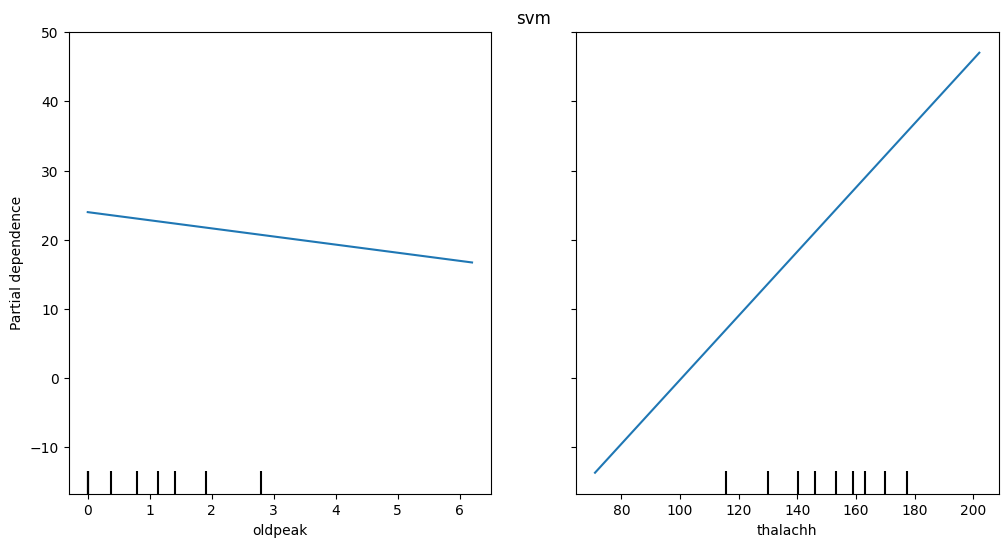

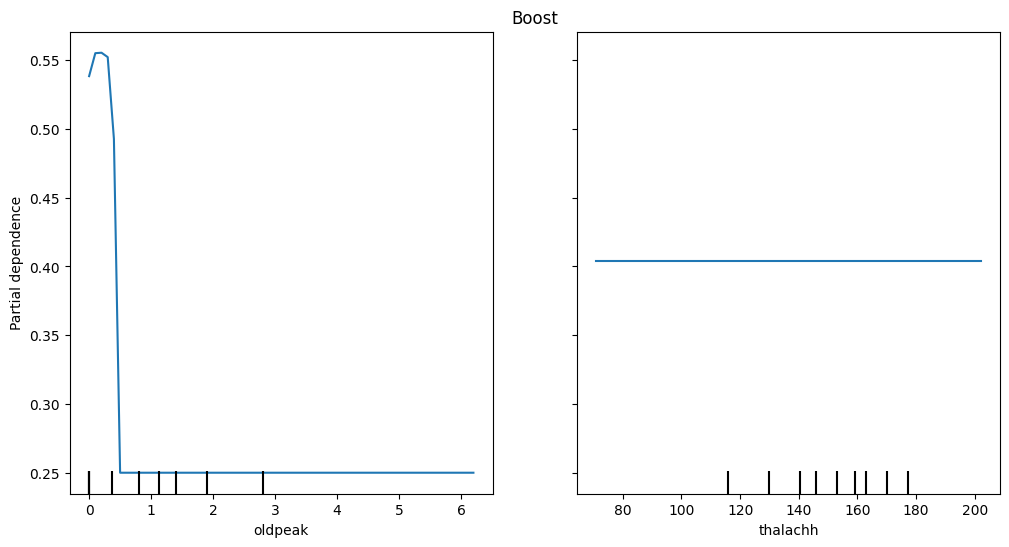

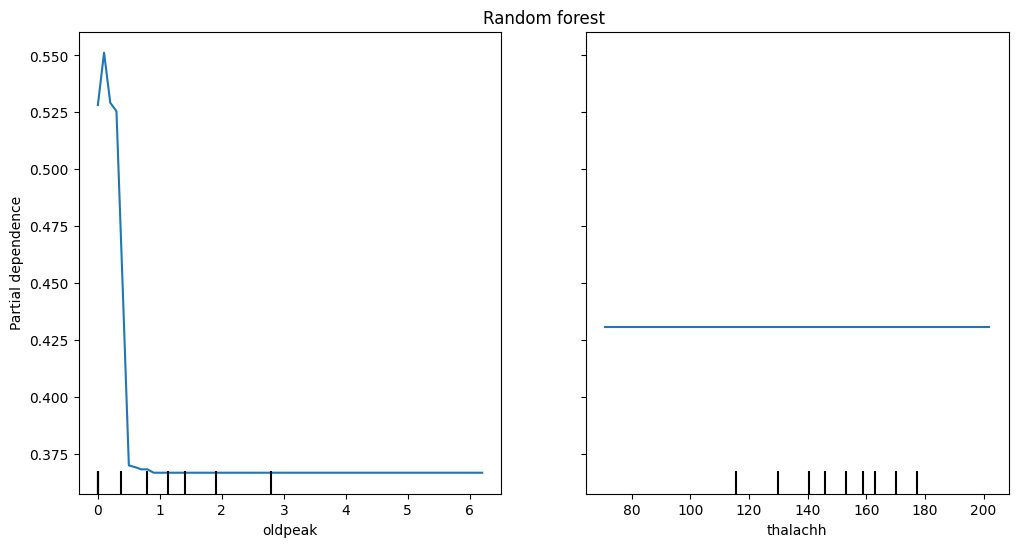

In [5]:
feature_names = ["oldpeak","thalachh"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(dt, X, feature_names, ax=ax)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Logistic regression")
tree_disp = PartialDependenceDisplay.from_estimator(logreg, X, feature_names, ax=ax)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("svm")
tree_disp = PartialDependenceDisplay.from_estimator(svm, X, feature_names, ax=ax)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Boost")
tree_disp = PartialDependenceDisplay.from_estimator(xgb_classifier, X, feature_names, ax=ax)



fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random forest")
rf_disp = PartialDependenceDisplay.from_estimator(rf, X, feature_names, ax=ax)




C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature 

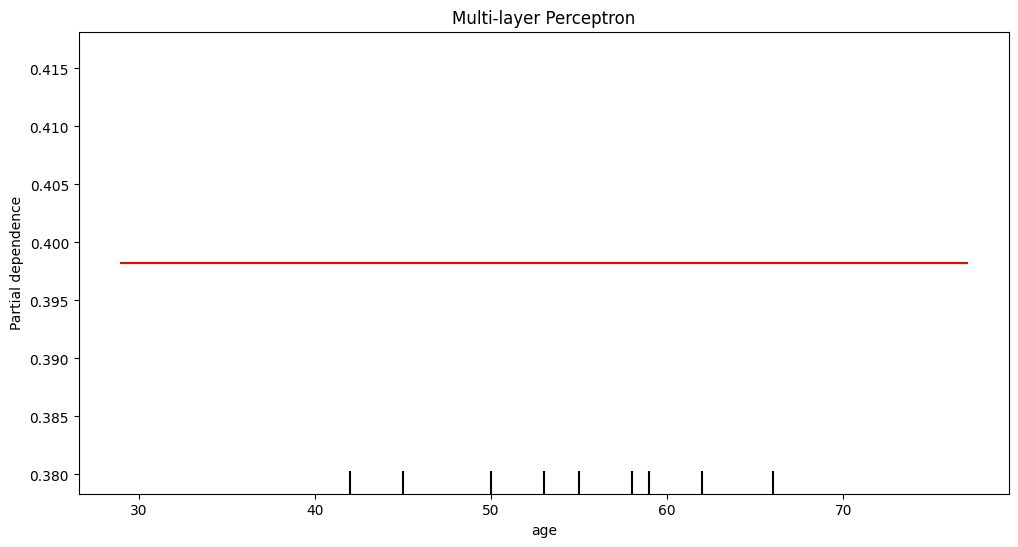

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    rf, X, ["age"], ax=ax, line_kw={"color": "red"}
)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=ax1, line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=ax2, line_kw={"label": "Multi-layer Perceptron", "color": "red"})
ax1.legend()
ax2.legend()